## Actividad 6

In [121]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import Curves2D
from matplotlib import colors
import matplotlib.ticker as ticker

https://plotly.com/python/getting-started/

In [122]:
pwd = os.getcwd()

Cargamos la tabla de datos que descargamos:

In [123]:
table   = pd.read_csv('Aperturas_RefL0100N1504_snap_28_aperture_30.dat')

In [124]:
DATA_sub = table[(table['Stars_Mass']>=1e10)].copy()
DATA_sub

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0       9498012  28000000000002       28  2.220446e-16               6   
1       9508202  28000000000002       28  2.220446e-16               7   
2       9512113  28000000000002       28  2.220446e-16               8   
3       9517736  28000000000002       28  2.220446e-16               9   
4       9519365  28000000000002       28  2.220446e-16              10   
...         ...             ...      ...           ...             ...   
13131  10365607  28000000002202       28  2.220446e-16               0   
13145  10859653  28000000002570       28  2.220446e-16               0   
13155  11104654  28000000002905       28  2.220446e-16               0   
13164  11247394  28000000003127       28  2.220446e-16               0   
13199  12002343  28000000004258       28  2.220446e-16               0   

       CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                 8.913222            35.828056            54.839039   
1                 6.904262            35.705917            57.397373   
2                 8.682913            35.504921            54.217369   
3                 8.278317            37.063808            54.914932   
4                 8.262937            36.454063            55.901993   
...                    ...                  ...                  ...   
13131            35.516003            10.797990            34.600616   
13145            61.355499            48.616516            65.236801   
13155            97.197350            82.709518            43.676567   
13164            88.764885            47.226864            81.905136   
13199            81.653595             7.551041            69.749985   

         Stars_Mass       SF_Mass  ...  NSF_Hydrogen  NSF_Oxygen  \
0      1.538708e+11  0.000000e+00  ...      0.000000    0.000000   
1      7.604099e+10  2.281596e+09  ...      0.727174    0.004796   
2      1.345128e+11  1.514760e+10  ...      0.696796    0.010628   
3      2.232997e+10  2.754609e+09  ...      0.714222    0.007443   
4      4.833353e+10  0.000000e+00  ...      0.000000    0.000000   
...             ...           ...  ...           ...         ...   
13131  1.226640e+10  1.538676e+09  ...      0.740806    0.002266   
13145  1.094640e+10  3.207207e+09  ...      0.741599    0.002183   
13155  1.200869e+10  1.247963e+09  ...      0.743705    0.001579   
13164  1.186733e+10  2.167418e+09  ...      0.737761    0.002874   
13199  1.051248e+10  5.572393e+08  ...      0.695981    0.010365   

       NSF_Metallicity  StarFormationRate  InitialMassWeightedStellarAge  \
0             0.000000           0.000000                      10.139413   
1             0.011342           0.841832                       9.455478   
2             0.024796          12.094972                       7.656161   
3             0.017283           1.334875                       8.117089   
4             0.000000           0.000000                       8.520104   
...                ...                ...                            ...   
13131         0.005160           0.456897                       7.618259   
13145         0.004858           1.192947                       6.309848   
13155         0.003758           0.506203                       6.814752   
13164         0.006602           0.686905                       6.787498   
13199         0.025381           0.195091                       7.920490   

       ApertureSize     Mass_Star  SFR_30pkpc  Group_R_Crit200  \
0                30  1.307842e+11    0.000000      1411.312012   
1                30  6.641890e+10    0.823222      1411.312012   
2                30  1.183275e+11   10.984530      1411.312012   
3                30  2.024596e+10    1.322288      1411.312012   
4                30  3.944613e+10    0.000000      1411.312012   
...             ...           ...         ...              ...   
13131            30  1.191011e+10    0.433110       179.04637

In [125]:
data = pd.read_csv('Actividad_5_v2_Parte_2.dat')

In [126]:
DATA = data.copy()
DATA

GalaxyID_test    GroupID_test  GalaxyID_V1  GalaxyID_V2       R_1  \
0           9498012  28000000000002      9532694      3461244  0.505941   
1           9508202  28000000000002      9562859     14910180  0.257705   
2           9512113  28000000000002      3467928      9554089  0.150475   
3           9517736  28000000000002      9537911      9542932  0.423763   
4           9519365  28000000000002      9542932      9539937  0.634224   
...             ...             ...          ...          ...       ...   
3633       10365607  28000000002202     18478750     18181888  1.911730   
3634       10859653  28000000002570      9779252      9744960  1.526021   
3635       11104654  28000000002905      9034191     10942165  1.503464   
3636       11247394  28000000003127     18043220     13249045  2.053687   
3637       12002343  28000000004258      9319534     16828343  0.576453   

           R_2     r_sep_1     r_sep_2      mu_1      mu_2  N_2  
0     0.518791   40.259414   48.797400  0.649263  0.125630   35  
1     0.463580   21.223224   33.711917  0.315459  0.823968    3  
2     0.231956   13.328678   18.674313  0.120308  0.314345   34  
3     0.677967   37.490817   56.695098  1.999591  1.722059   35  
4     0.952579   38.135130   67.823802  0.795587  0.615451   34  
...        ...         ...         ...       ...       ...  ...  
3633  3.737239  212.966353  260.881095  2.058146  2.369121    1  
3634  5.217671  148.669482  531.640719  2.014763  1.325153    1  
3635  2.124332  167.615303  244.177300  1.657043  0.965701    1  
3636  2.693730  123.996389  183.269247  4.079843  1.619644    0  
3637  1.202926   67.695244  114.050544  2.021934  5.654810    9  

[3638 rows x 11 columns]

In [127]:
merge = pd.merge(left=DATA_sub,right=DATA, left_on='GalaxyID', right_on='GalaxyID_test')

In [128]:
merge

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0      9498012  28000000000002       28  2.220446e-16               6   
1      9508202  28000000000002       28  2.220446e-16               7   
2      9512113  28000000000002       28  2.220446e-16               8   
3      9517736  28000000000002       28  2.220446e-16               9   
4      9519365  28000000000002       28  2.220446e-16              10   
...        ...             ...      ...           ...             ...   
3633  10365607  28000000002202       28  2.220446e-16               0   
3634  10859653  28000000002570       28  2.220446e-16               0   
3635  11104654  28000000002905       28  2.220446e-16               0   
3636  11247394  28000000003127       28  2.220446e-16               0   
3637  12002343  28000000004258       28  2.220446e-16               0   

      CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                8.913222            35.828056            54.839039   
1                6.904262            35.705917            57.397373   
2                8.682913            35.504921            54.217369   
3                8.278317            37.063808            54.914932   
4                8.262937            36.454063            55.901993   
...                   ...                  ...                  ...   
3633            35.516003            10.797990            34.600616   
3634            61.355499            48.616516            65.236801   
3635            97.197350            82.709518            43.676567   
3636            88.764885            47.226864            81.905136   
3637            81.653595             7.551041            69.749985   

        Stars_Mass       SF_Mass  ...    GroupID_test  GalaxyID_V1  \
0     1.538708e+11  0.000000e+00  ...  28000000000002      9532694   
1     7.604099e+10  2.281596e+09  ...  28000000000002      9562859   
2     1.345128e+11  1.514760e+10  ...  28000000000002      3467928   
3     2.232997e+10  2.754609e+09  ...  28000000000002      9537911   
4     4.833353e+10  0.000000e+00  ...  28000000000002      9542932   
...            ...           ...  ...             ...          ...   
3633  1.226640e+10  1.538676e+09  ...  28000000002202     18478750   
3634  1.094640e+10  3.207207e+09  ...  28000000002570      9779252   
3635  1.200869e+10  1.247963e+09  ...  28000000002905      9034191   
3636  1.186733e+10  2.167418e+09  ...  28000000003127     18043220   
3637  1.051248e+10  5.572393e+08  ...  28000000004258      9319534   

      GalaxyID_V2       R_1       R_2     r_sep_1     r_sep_2      mu_1  \
0         3461244  0.505941  0.518791   40.259414   48.797400  0.649263   
1        14910180  0.257705  0.463580   21.223224   33.711917  0.315459   
2         9554089  0.150475  0.231956   13.328678   18.674313  0.120308   
3         9542932  0.423763  0.677967   37.490817   56.695098  1.999591   
4         9539937  0.634224  0.952579   38.135130   67.823802  0.795587   
...           ...       ...       ...         ...         ...       ...   
3633     18181888  1.911730  3.737239  212.966353  260.881095  2.058146   
3634      9744960  1.526021  5.217671  148.669482  531.640719  2.014763   
3635     10942165  1.503464  2.124332  167.615303  244.177300  1.657043   
3636     13249045  2.053687  2.693730  123.996389  183.269247  4.079843   
3637     16828343  0.576453  1.202926   67.695244  114.050544  2.021934   

          mu_2  N_2  
0     0.125630   35  
1     0.823968    3  
2     0.314345   34  
3     1.722059   35  
4     0.615451   34  
...        ...  ...  
3633  2.369121    1  
3634  1.325153    1  
3635  0.965701    1  
3636  1.619644    0  
3637  5.654810    9  

[3638 rows x 43 columns]

Creo la columna de la metalicidad componente star forming 

In [129]:
SF_O  = merge['SF_Oxygen']
SF_H  = merge['SF_Hydrogen']
SF_M  = merge['SF_Mass']
M_Star= merge['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

merge['sf_metalicity'] = 12+np.log10(M_O_SF/(16*M_H_SF))
merge

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0      9498012  28000000000002       28  2.220446e-16               6   
1      9508202  28000000000002       28  2.220446e-16               7   
2      9512113  28000000000002       28  2.220446e-16               8   
3      9517736  28000000000002       28  2.220446e-16               9   
4      9519365  28000000000002       28  2.220446e-16              10   
...        ...             ...      ...           ...             ...   
3633  10365607  28000000002202       28  2.220446e-16               0   
3634  10859653  28000000002570       28  2.220446e-16               0   
3635  11104654  28000000002905       28  2.220446e-16               0   
3636  11247394  28000000003127       28  2.220446e-16               0   
3637  12002343  28000000004258       28  2.220446e-16               0   

      CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                8.913222            35.828056            54.839039   
1                6.904262            35.705917            57.397373   
2                8.682913            35.504921            54.217369   
3                8.278317            37.063808            54.914932   
4                8.262937            36.454063            55.901993   
...                   ...                  ...                  ...   
3633            35.516003            10.797990            34.600616   
3634            61.355499            48.616516            65.236801   
3635            97.197350            82.709518            43.676567   
3636            88.764885            47.226864            81.905136   
3637            81.653595             7.551041            69.749985   

        Stars_Mass       SF_Mass  ...  GalaxyID_V1  GalaxyID_V2       R_1  \
0     1.538708e+11  0.000000e+00  ...      9532694      3461244  0.505941   
1     7.604099e+10  2.281596e+09  ...      9562859     14910180  0.257705   
2     1.345128e+11  1.514760e+10  ...      3467928      9554089  0.150475   
3     2.232997e+10  2.754609e+09  ...      9537911      9542932  0.423763   
4     4.833353e+10  0.000000e+00  ...      9542932      9539937  0.634224   
...            ...           ...  ...          ...          ...       ...   
3633  1.226640e+10  1.538676e+09  ...     18478750     18181888  1.911730   
3634  1.094640e+10  3.207207e+09  ...      9779252      9744960  1.526021   
3635  1.200869e+10  1.247963e+09  ...      9034191     10942165  1.503464   
3636  1.186733e+10  2.167418e+09  ...     18043220     13249045  2.053687   
3637  1.051248e+10  5.572393e+08  ...      9319534     16828343  0.576453   

           R_2     r_sep_1     r_sep_2      mu_1      mu_2  N_2  sf_metalicity  
0     0.518791   40.259414   48.797400  0.649263  0.125630   35            NaN  
1     0.463580   21.223224   33.711917  0.315459  0.823968    3       9.079824  
2     0.231956   13.328678   18.674313  0.120308  0.314345   34       9.246274  
3     0.677967   37.490817   56.695098  1.999591  1.722059   35       9.050028  
4     0.952579   38.135130   67.823802  0.795587  0.615451   34            NaN  
...        ...         ...         ...       ...       ...  ...            ...  
3633  3.737239  212.966353  260.881095  2.058146  2.369121    1       9.085429  
3634  5.217671  148.669482  531.640719  2.014763  1.325153    1       9.024783  
3635  2.124332  167.615303  244.177300  1.657043  0.965701    1       9.286851  
3636  2.693730  123.996389  183.269247  4.079843  1.619644    0       9.115270  
3637  1.202926   67.695244  114.050544  2.021934  5.654810    9       9.411070  

[3638 rows x 44 columns]

## Graficar 12+log10(O/H) vs log10(Mstar) (scatter plot + medianas + percentiles 25th y 75th).

In [130]:
mask = (merge['sf_metalicity'].notna())
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [131]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

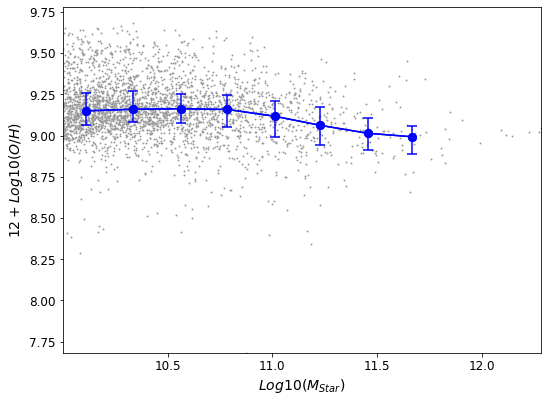

In [132]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig('scatter_log(M)vs_metalicidad.png')


plt.show()

**Coloreado de scatter plot para número de vecinos a menos de 2Mpc**

In [133]:
parametro ='N_2'

In [134]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [135]:
color = merge[parametro][mask].to_numpy()

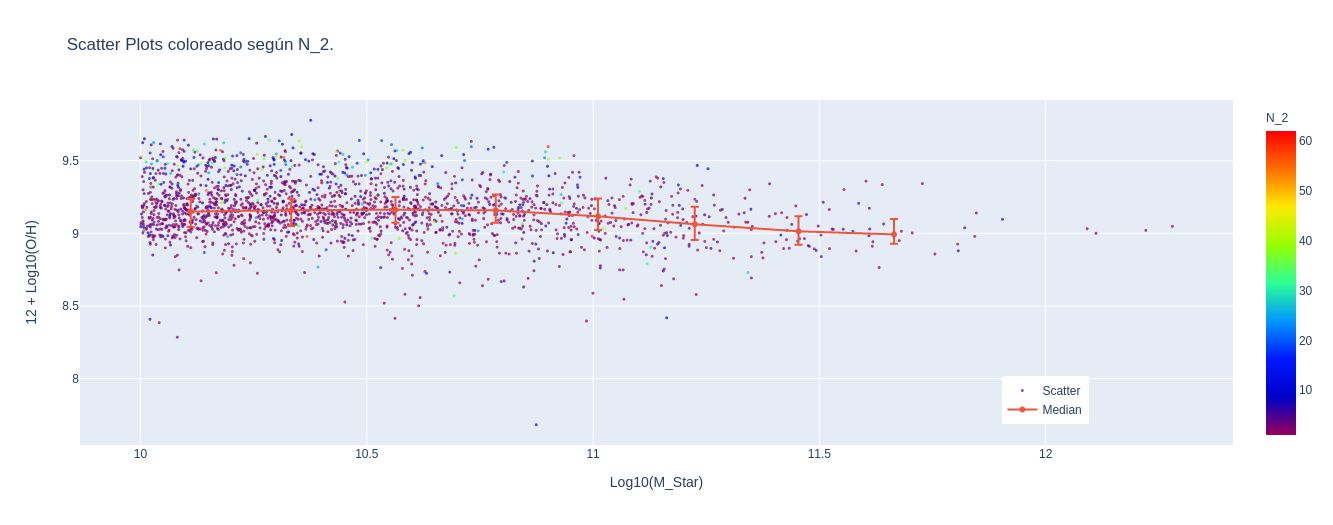

In [136]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

**Coloreado de scatter plot para distancia del primer vecino**

In [137]:
parametro ='R_1'

In [138]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [139]:
color = merge[parametro][mask].to_numpy()

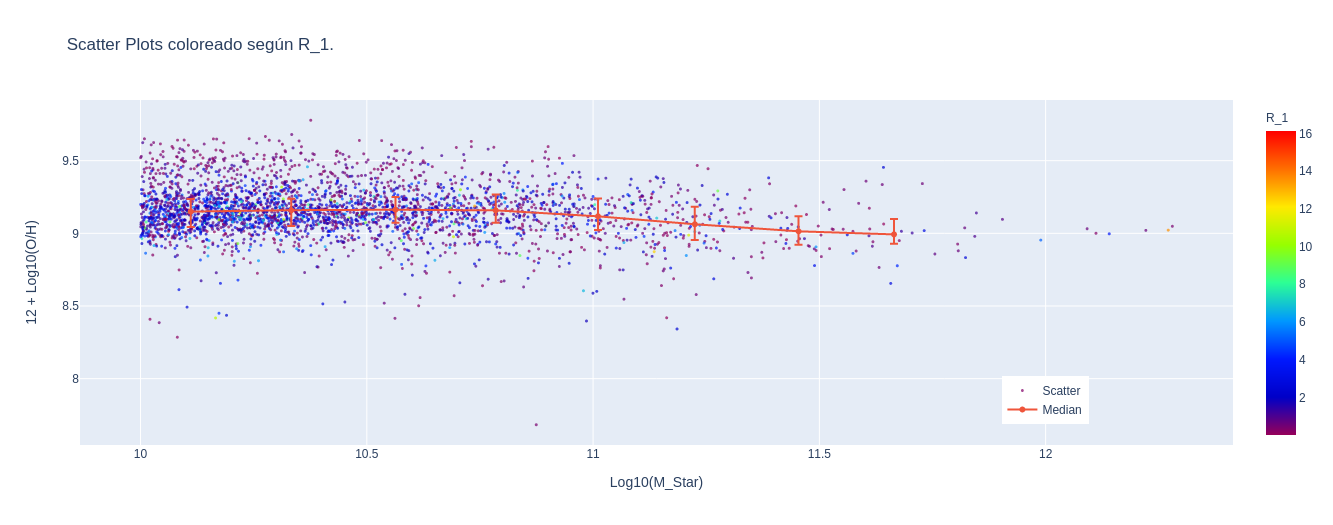

In [140]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para distancia del segundo vecino**

In [141]:
parametro ='R_2'

In [142]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [143]:
color = merge[parametro][mask].to_numpy()

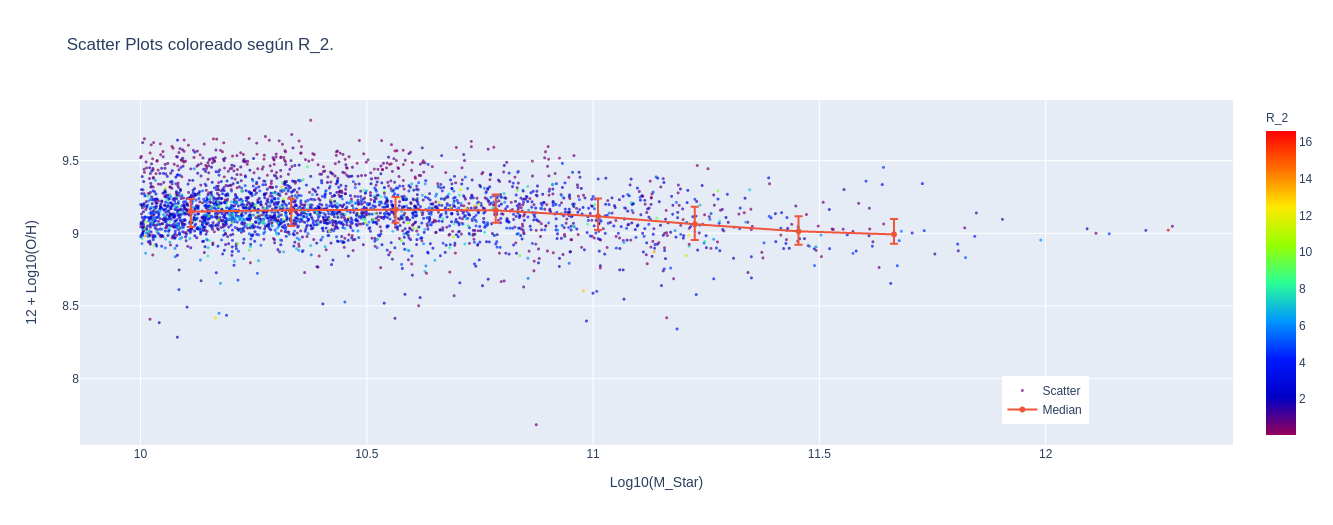

In [144]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el R_sep con el primer vecino**

In [145]:
parametro ='r_sep_1'

In [146]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [147]:
color = merge[parametro][mask].to_numpy()

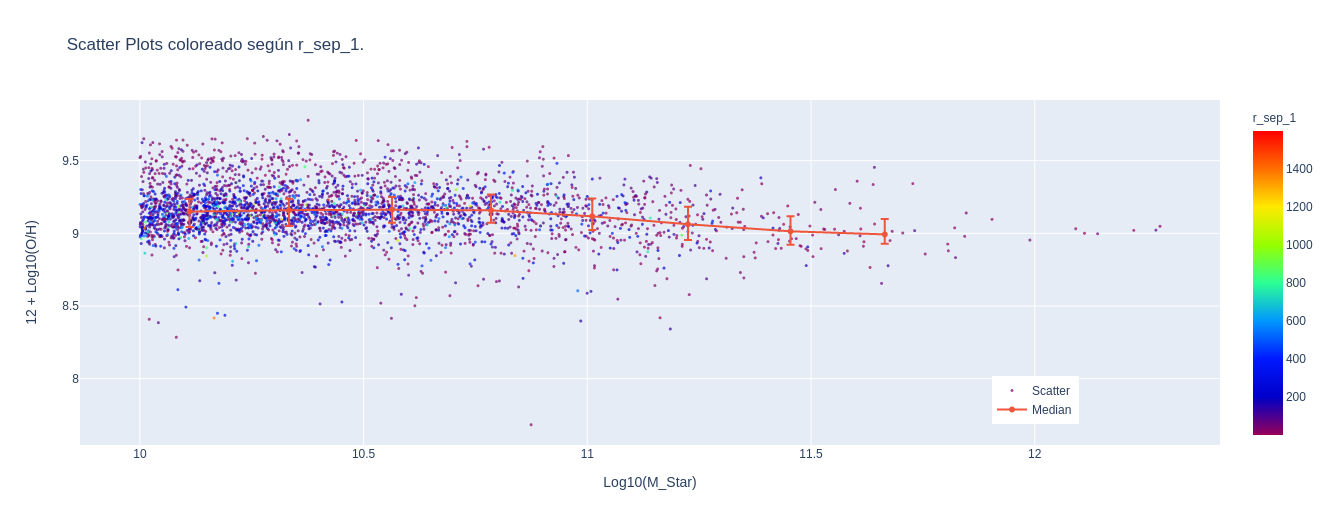

In [148]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el R_sep con el segundo vecino**

In [149]:
parametro ='r_sep_2'

In [150]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [151]:
color = merge[parametro][mask].to_numpy()

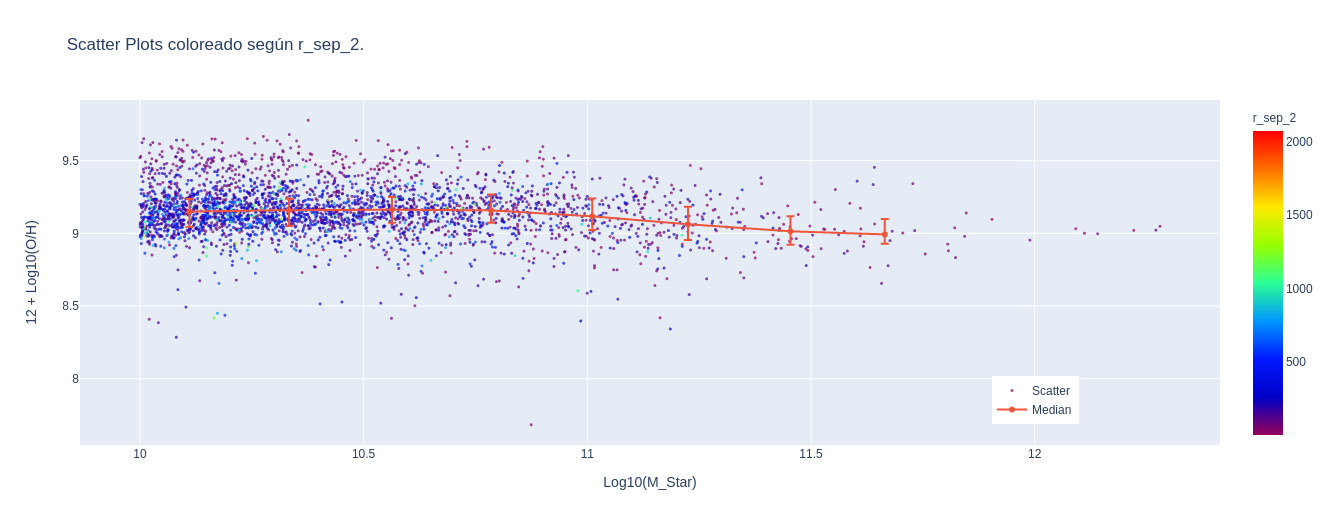

In [152]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el la relación entre masas con el primer vecino**

In [153]:
parametro ='mu_1'

In [154]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [155]:
color = merge[parametro][mask].to_numpy()

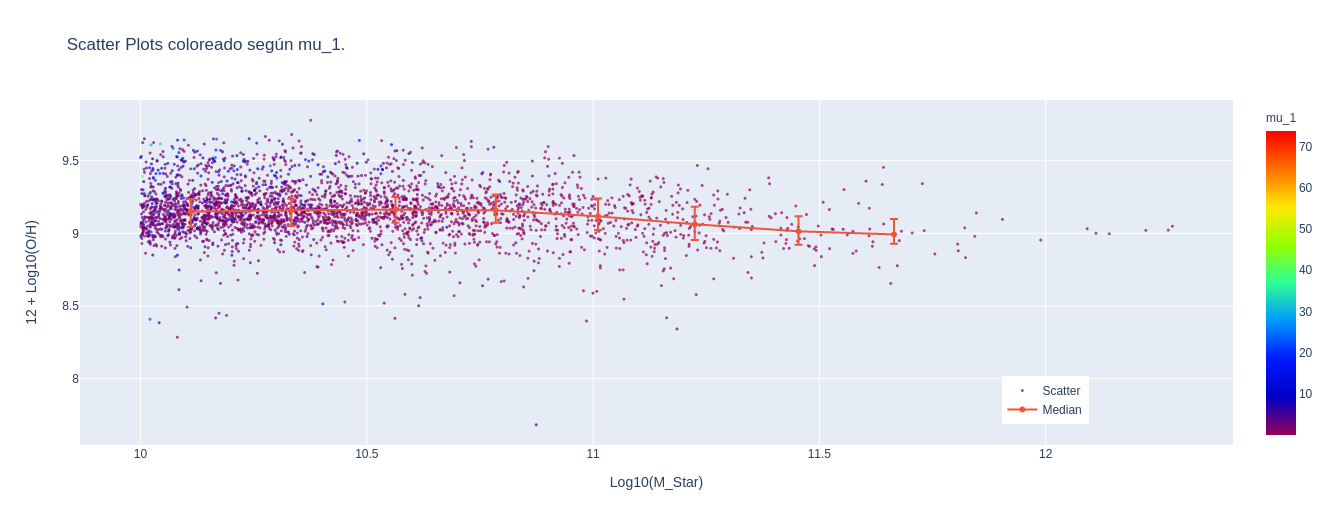

In [156]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el la relación entre masas con el segundo vecino**

In [157]:
parametro ='mu_2'

In [158]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [159]:
color = merge[parametro][mask].to_numpy()

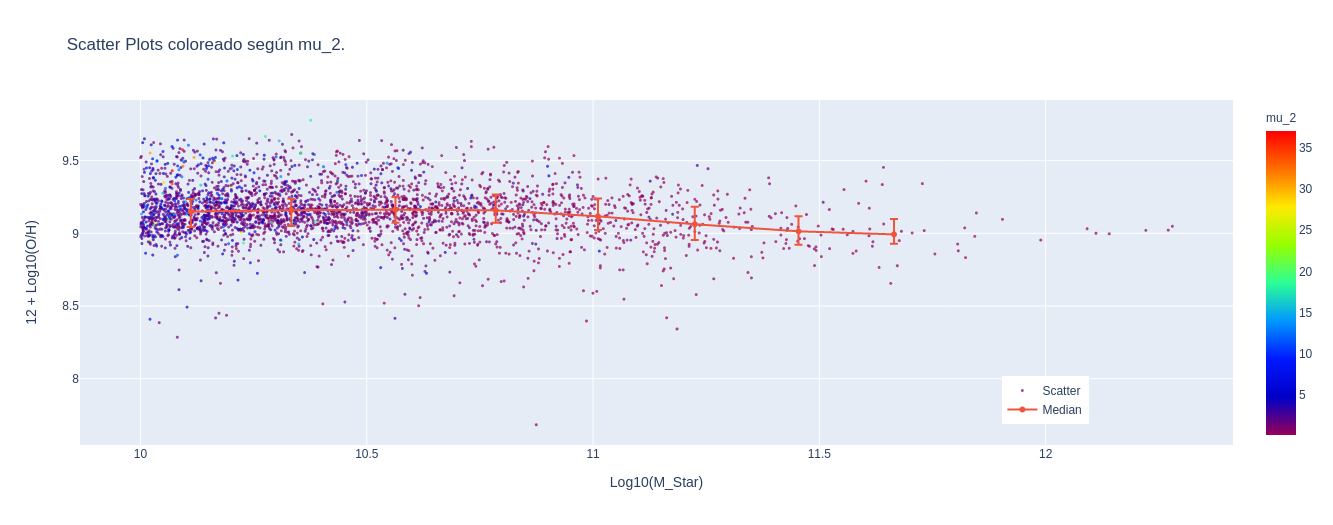

In [160]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

In [174]:
Ahora vemos si los valores extremos de los parámtros se desvían de la media. 

NameError: name 'dddffffdd' is not defined

In [181]:
parametro  ='r_sep_1'
parametro_2='mu_1'
cota_par   = 50
cota_par_2 = 1

In [182]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]<cota_par)&(merge[parametro_2]>cota_par_2)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [183]:
color = merge[parametro][mask].to_numpy()

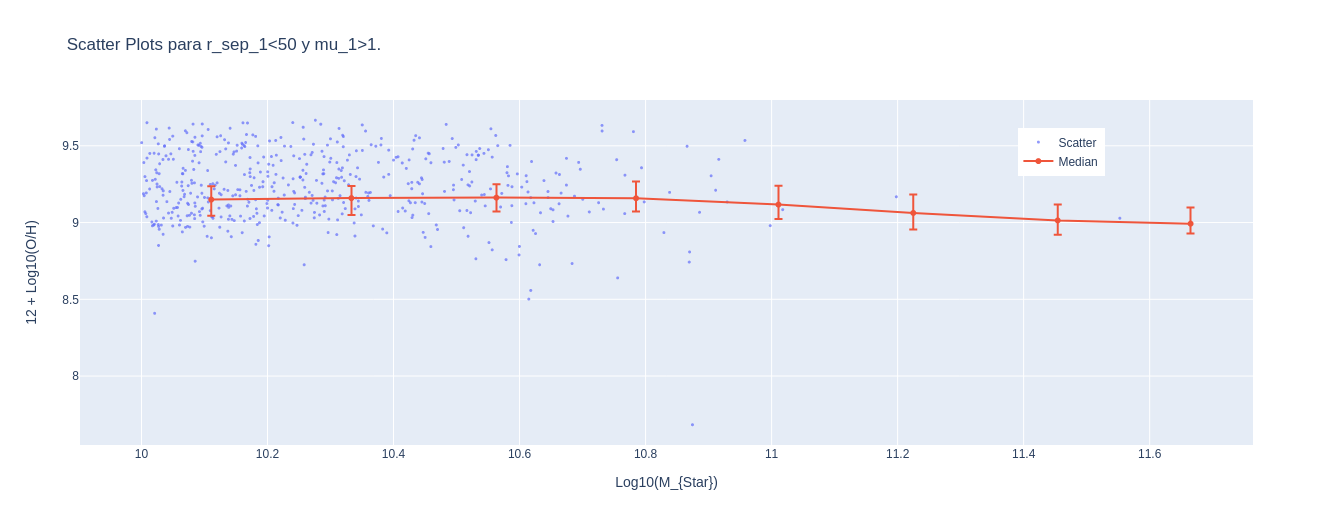

In [184]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
#                                  color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=False,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots para '+parametro+'<'+str(cota_par)+' y '+parametro_2+'>'+str(cota_par_2)+'.')

fig.update_xaxes(title_text = 'Log10(M_{Star})')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

In [169]:
parametro  ='N_2'
parametro_2='mu_1'
cota_par   = 10
cota_par_2 = 1

In [170]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>cota_par)&(merge[parametro_2]<cota_par_2)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [171]:
color = merge[parametro][mask].to_numpy()

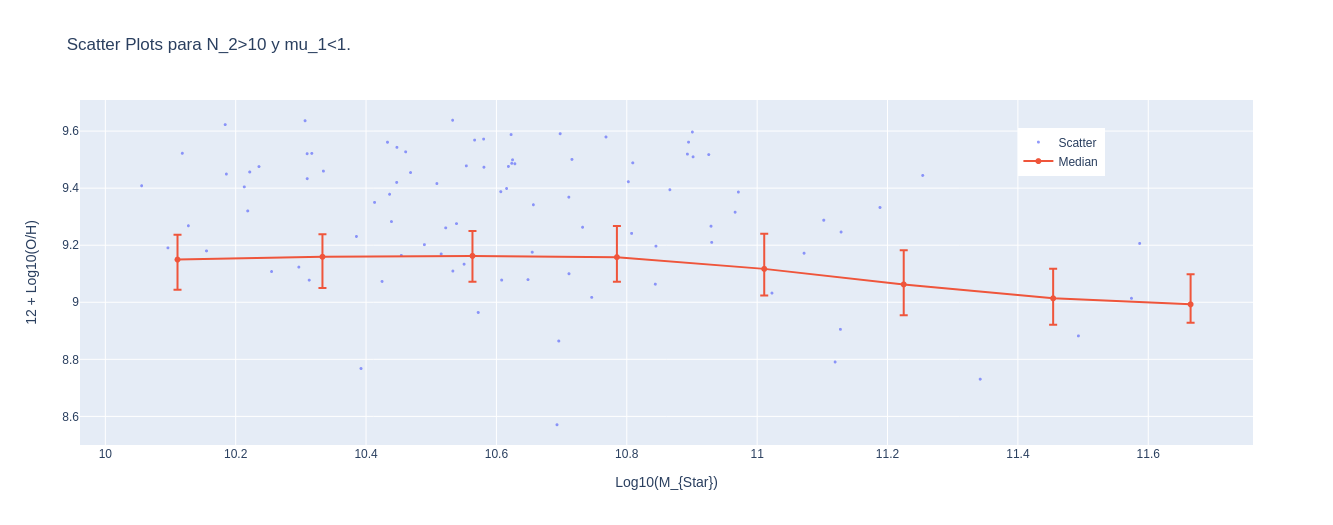

In [172]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
#                                  color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=False,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots para '+parametro+'>'+str(cota_par)+' y '+parametro_2+'<'+str(cota_par_2)+'.')

fig.update_xaxes(title_text = 'Log10(M_{Star})')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

In [91]:
parametro  ='N_2'
parametro_2='mu_1'
cota_par   = 30
cota_par_2 = 5

In [92]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>cota_par)&(merge[parametro_2]>cota_par_2)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [93]:
color = merge[parametro][mask].to_numpy()

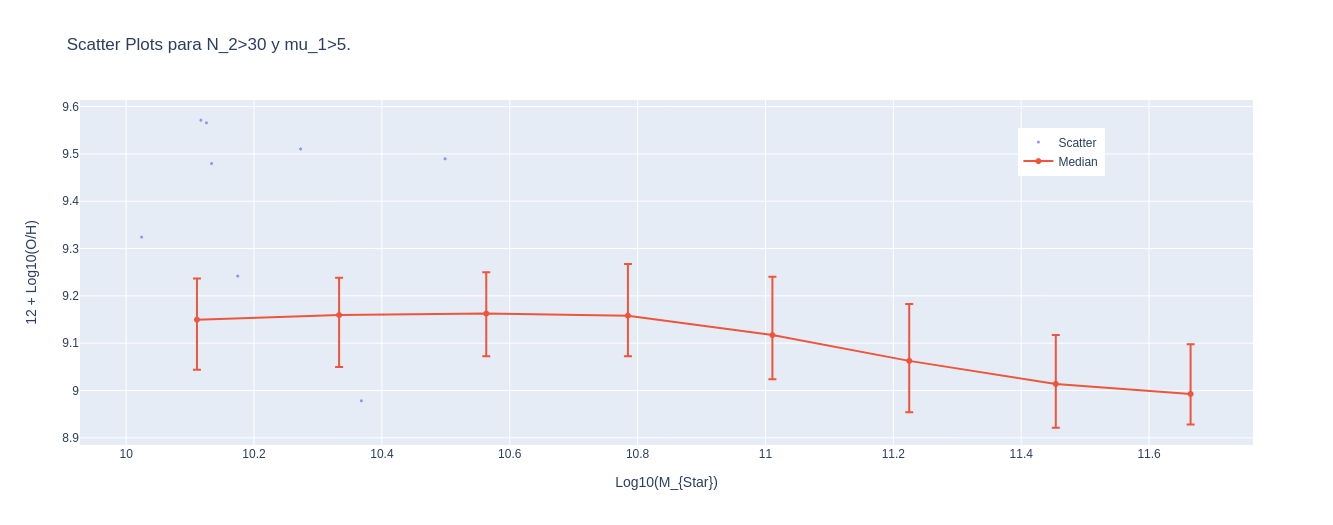

In [94]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
#                                  color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=False,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[0],
                                 arrayminus=yerror[1])
    )])

fig.update_layout(title='Scatter Plots para '+parametro+'>'+str(cota_par)+' y '+parametro_2+'>'+str(cota_par_2)+'.')

fig.update_xaxes(title_text = 'Log10(M_{Star})')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()